# basic data-preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/''wine/wine.data', header=None)

In [ ]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X ,y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size =0.3, random_state =0, stratify =y)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
stdsc = StandardScaler()

In [ ]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Accessing Feature Importance wih random Forest


Feature Selection with Importance; Feature Importance. Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels = df_wine.columns[1:]

In [ ]:
feat_labels

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [ ]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
importances = forest.feature_importances_

In [ ]:
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2])

In [ ]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1 ,30, feat_labels[indices[f]],
                           importances[indices[f]]))

 1) 13                             0.185453
 2) 7                              0.174751
 3) 10                             0.143920
 4) 12                             0.136162
 5) 1                              0.118529
 6) 11                             0.058739
 7) 6                              0.050872
 8) 5                              0.031357
 9) 2                              0.025648
10) 9                              0.025570
11) 4                              0.022366
12) 8                              0.013354
13) 3                              0.013279


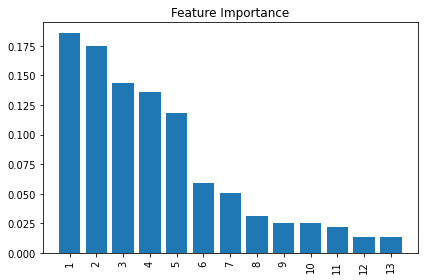

In [ ]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')

plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

In [ ]:
X_selected = sfm.transform(X_train)

In [ ]:
X_selected

array([[1.362000e+01, 8.000000e-01, 4.400000e+00, 2.050000e+00,
        5.500000e+02],
       [1.376000e+01, 2.740000e+00, 5.400000e+00, 3.000000e+00,
        1.235000e+03],
       [1.373000e+01, 3.250000e+00, 5.700000e+00, 2.710000e+00,
        1.285000e+03],
       [1.351000e+01, 2.530000e+00, 4.200000e+00, 2.870000e+00,
        1.095000e+03],
       [1.260000e+01, 6.600000e-01, 7.100000e+00, 1.580000e+00,
        6.950000e+02],
       [1.208000e+01, 2.290000e+00, 2.900000e+00, 3.190000e+00,
        3.850000e+02],
       [1.222000e+01, 2.040000e+00, 2.700000e+00, 3.020000e+00,
        3.120000e+02],
       [1.251000e+01, 5.800000e-01, 5.450000e+00, 1.510000e+00,
        6.500000e+02],
       [1.269000e+01, 1.460000e+00, 3.050000e+00, 2.060000e+00,
        4.950000e+02],
       [1.182000e+01, 1.640000e+00, 2.060000e+00, 2.440000e+00,
        4.150000e+02],
       [1.349000e+01, 1.840000e+00, 3.740000e+00, 2.780000e+00,
        4.720000e+02],
       [1.388000e+01, 3.560000e+00, 5.43000

In [ ]:
print('Number of samples that meet this criterion:',X_selected.shape[0])
print('Number of samples that meet this criterion:',len(X_selected))

Number of samples that meet this criterion: 124
Number of samples that meet this criterion: 124


In [ ]:
for f in range(X_selected.shape[1]):print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

 1) 13                             0.185453
 2) 7                              0.174751
 3) 10                             0.143920
 4) 12                             0.136162
 5) 1                              0.118529


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57949008-d14a-4ee2-8f47-e94cc0939f85' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>